# Set Up

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)


In [2]:
#path = 'drive/MyDrive/Colab Notebooks/Cluster Bukit Vista/final_dataset_v2_no_NA.csv'
path = 'final_dataset_v2_no_NA.csv'

# Dataset

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1395,Room 1,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,1,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1396,Room 2,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,2,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1397,Room 3,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,3,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1398,Room 4,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,4,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1399,Room 5,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189


In [4]:
# df['property_type'].unique()

In [5]:
# df['area_name'].unique()

# EDA & Preprocessing

In [6]:
#df = df.dropna()

In [7]:
#df.to_csv('drive/MyDrive/Colab Notebooks/Cluster Bukit Vista/final_dataset_v2_no_NA.csv')

In [8]:
property_type = df['property_type']
unit_type = df['unit_type']
area_name = df['area_name']
unit = df['unit_id']

In [9]:
# df.set_index('unit_id', inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['area_name'] = label_encoder.fit_transform(df['area_name'])
# df['unit_id'] = df['unit_id'].str[2:].astype(int)
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['unit_type'] = label_encoder.fit_transform(df['unit_type'])
df.head()

,Unnamed: 0,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,0,PR0057,Teges Asri,7,0,UN1395,Room 1,74,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,1,0,PR0057,Teges Asri,7,0,UN1396,Room 2,74,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,2,0,PR0057,Teges Asri,7,0,UN1397,Room 3,74,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,3,0,PR0057,Teges Asri,7,0,UN1398,Room 4,74,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,4,0,PR0057,Teges Asri,7,0,UN1399,Room 5,74,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189


In [11]:
# df['property_type'].unique()

In [12]:
# df['area_name'].unique()

In [13]:
# df.columns

In [14]:
df = df[['area_name', 'property_type', # 'unit_type',
         'price_per_unit','overall_rating','bedroom',
         'bathroom', 'beds', 'tv', 'wifi', 'ac','parking',
         'pool', 'breakfast','building_staff']]
df.head()

,area_name,property_type,price_per_unit,overall_rating,bedroom,bathroom,beds,tv,wifi,ac,parking,pool,breakfast,building_staff
0,0,0,1.170735e+06,4.702576,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0,0,1.201892e+06,4.824885,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0,0,1.237458e+06,4.674419,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0,0,1.195869e+06,4.810275,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0,0,1.189912e+06,4.794189,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [15]:
#df.describe()

In [16]:
# df['property_type'].value_counts()

0 : 'Guesthouse',
4 : 'Villa',
1 : 'Hostel',
3 : 'Resort',
2 : 'House'

In [17]:
# sns.pairplot(df, hue='property_type')

In [18]:
# sns.pairplot(df)

In [19]:
# df = df.drop(column='')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int32  
 1   property_type   331 non-null    int32  
 2   price_per_unit  331 non-null    float64
 3   overall_rating  331 non-null    float64
 4   bedroom         331 non-null    float64
 5   bathroom        331 non-null    float64
 6   beds            331 non-null    float64
 7   tv              331 non-null    float64
 8   wifi            331 non-null    float64
 9   ac              331 non-null    float64
 10  parking         331 non-null    float64
 11  pool            331 non-null    float64
 12  breakfast       331 non-null    float64
 13  building_staff  331 non-null    float64
dtypes: float64(12), int32(2)
memory usage: 33.7 KB


In [21]:
df['price_per_unit'] = (df['price_per_unit']  - df['price_per_unit'].min())/(df['price_per_unit'].max() - df['price_per_unit'].min())
#df['total_bookings'] = (df['total_bookings']  - df['total_bookings'].min())/(df['total_bookings'].max() - df['total_bookings'].min())
df['overall_rating'] = (df['overall_rating']  - df['overall_rating'].min())/(df['overall_rating'].max() - df['overall_rating'].min())

df['bedroom'] = (df['bedroom']  - df['bedroom'].min())/(df['bedroom'].max() - df['bedroom'].min())
df['bathroom'] = (df['bathroom']  - df['bathroom'].min())/(df['bathroom'].max() - df['bathroom'].min())
df['beds'] = (df['beds']  - df['beds'].min())/(df['beds'].max() - df['beds'].min())

df['area_name'] = (df['area_name']  - df['area_name'].min())/(df['area_name'].max() - df['area_name'].min())
#df['unit_type'] = (df['unit_type']  - df['unit_type'].min())/(df['unit_type'].max() - df['unit_type'].min())
df['property_type'] = (df['property_type']  - df['property_type'].min())/(df['property_type'].max() - df['property_type'].min())
#df['property_bedrooms'] = (df['property_bedrooms']  - df['property_bedrooms'].min())/(df['property_bedrooms'].max() - df['property_bedrooms'].min())

df.head()

,area_name,property_type,price_per_unit,overall_rating,bedroom,bathroom,beds,tv,wifi,ac,parking,pool,breakfast,building_staff
0,0.0,0.0,0.154179,0.791803,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.159478,0.877419,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.165527,0.772093,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.158453,0.867192,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.157440,0.855932,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [22]:
#sns.pairplot(df)

In [23]:
# df['breakfast'].value_counts()

Normalisasi

In [24]:
from sklearn.preprocessing import Normalizer, StandardScaler
normal_values = Normalizer().fit_transform(df.values)
print(normal_values)

[[0.    0.    0.071 ... 0.46  0.    0.   ]
 [0.    0.    0.072 ... 0.453 0.    0.   ]
 [0.    0.    0.069 ... 0.419 0.    0.419]
 ...
 [0.341 0.341 0.097 ... 0.341 0.    0.341]
 [0.346 0.346 0.07  ... 0.346 0.    0.   ]
 [0.341 0.341 0.067 ... 0.341 0.    0.   ]]


# PCA

In [25]:
from sklearn.decomposition import PCA

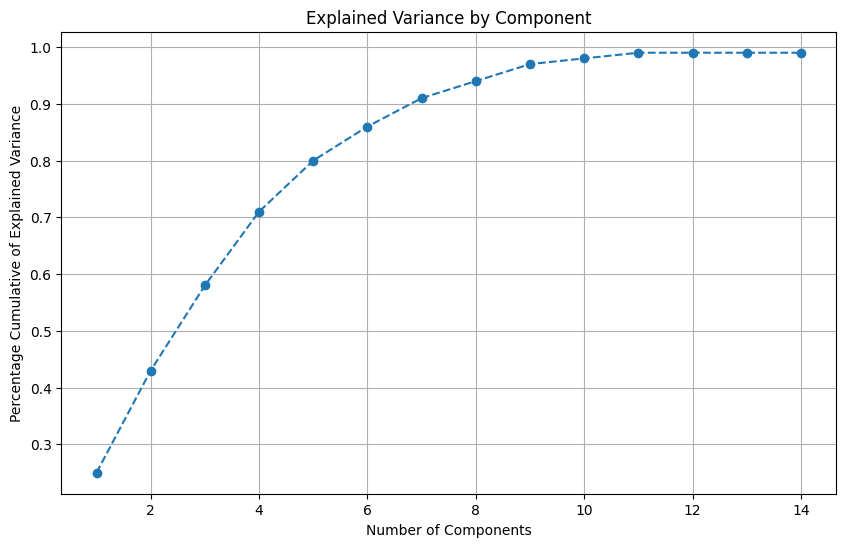

In [26]:
pca = PCA()
pca.fit(df)
per_var = np.round(pca.explained_variance_ratio_, decimals = 2)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

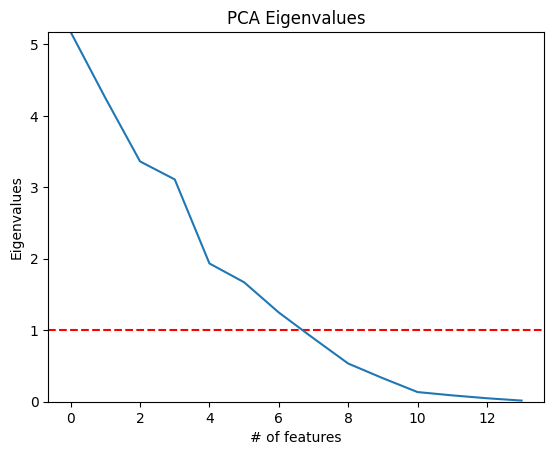

In [27]:
pca = PCA()
pca.fit(normal_values)

plt.ylabel('Eigenvalues')
plt.xlabel('# of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_)*100)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='red', linestyle='--')
plt.plot(pca.explained_variance_*100)
plt.show()

In [28]:
from sklearn.decomposition import PCA
import numpy as np

# Menghitung standar deviasi dari setiap komponen PC
std_deviation = np.sqrt(pca.explained_variance_)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print summary
print("PCA Summary:")
for i in range(len(explained_variance_ratio)):
    print("PC{} St dev: {:.2f}; Variance Explained: {:.2f}; Cumulative Variance: {:.2f}.".format(i+1, std_deviation[i], 
                                                                                  explained_variance_ratio[i], 
                                                                                  cumulative_variance_ratio[i]))

PCA Summary:
PC1 St dev: 0.23; Variance Explained: 0.23; Cumulative Variance: 0.23.
PC2 St dev: 0.21; Variance Explained: 0.19; Cumulative Variance: 0.41.
PC3 St dev: 0.18; Variance Explained: 0.15; Cumulative Variance: 0.56.
PC4 St dev: 0.18; Variance Explained: 0.14; Cumulative Variance: 0.70.
PC5 St dev: 0.14; Variance Explained: 0.08; Cumulative Variance: 0.78.
PC6 St dev: 0.13; Variance Explained: 0.07; Cumulative Variance: 0.86.
PC7 St dev: 0.11; Variance Explained: 0.05; Cumulative Variance: 0.91.
PC8 St dev: 0.09; Variance Explained: 0.04; Cumulative Variance: 0.95.
PC9 St dev: 0.07; Variance Explained: 0.02; Cumulative Variance: 0.97.
PC10 St dev: 0.06; Variance Explained: 0.01; Cumulative Variance: 0.99.
PC11 St dev: 0.04; Variance Explained: 0.01; Cumulative Variance: 0.99.
PC12 St dev: 0.03; Variance Explained: 0.00; Cumulative Variance: 1.00.
PC13 St dev: 0.02; Variance Explained: 0.00; Cumulative Variance: 1.00.
PC14 St dev: 0.01; Variance Explained: 0.00; Cumulative Vari

## component = 5

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

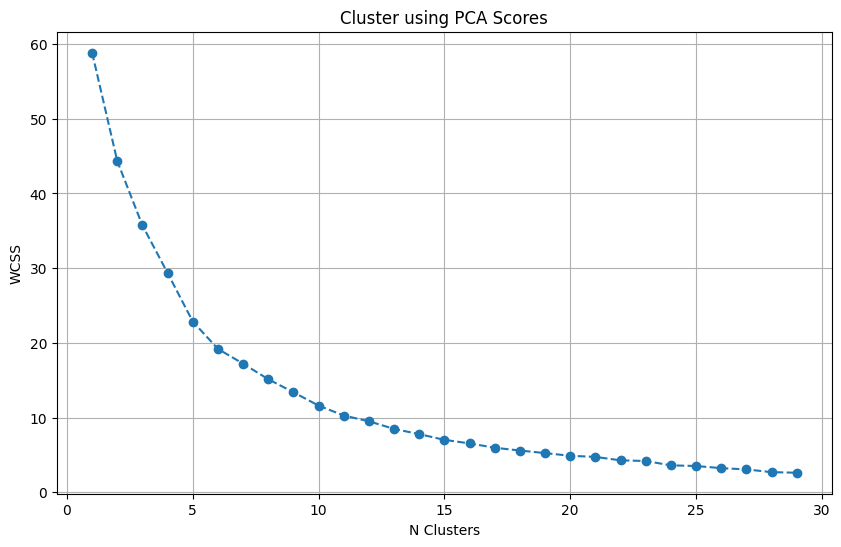

In [29]:
compca = 5

pca = PCA(n_components = compca)
pca.fit(normal_values)
scores_pca = pca.transform(normal_values)

from sklearn.cluster import KMeans
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [30]:
# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_),
    columns=df.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Identify the top contributing features for each principal component
top_features_per_pc = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features_per_pc)

,0
PC1,"[tv, property_type, building_staff, ac, pool]"
PC2,"[pool, building_staff, breakfast, area_name, w..."
PC3,"[property_type, breakfast, tv, bathroom, bedroom]"
PC4,"[building_staff, pool, tv, area_name, wifi]"
PC5,"[area_name, pool, parking, breakfast, overall_..."


# K-Means

### K = 6

In [31]:
comp = ["comp1", "comp2", "comp3", "comp4", "comp5", 'comp6','comp7','comp8','comp9'] #
sub = k = 6

kmeans_k = KMeans(n_clusters = k, init = "k-means++", random_state = 42)
kmeans_k.fit(scores_pca)

df_unit = pd.concat([unit, df], axis = 1)
df_clust_pca_kmeans = pd.concat([df_unit, pd.DataFrame(scores_pca)], axis = 1)
#df_clust_pca_kmeans

# Renaming the column label from each component
df_clust_pca_kmeans.columns.values[-compca:] = comp[:compca]

# Seting the cluster label to each observation, using the atribute .labels_
df_clust_pca_kmeans["segment_kmeans_pca"] = kmeans_k.labels_

# Mapping each cluster segmentation and renaming their labels
df_clust_pca_kmeans["segment"] = df_clust_pca_kmeans["segment_kmeans_pca"].map({0:"Cluster 1", 1:"Cluster 2",
                                                                                    2:"Cluster 3", 3:"Cluster 4",
                                                                                    4:"Cluster 5", 5:"Cluster 6", 
                                                                                    6:"Cluster 7", 7:"Cluster 8",
                                                                                    8:"Cluster 9",9:"Cluster 10"})

np.round(pd.DataFrame(df_clust_pca_kmeans['segment'].value_counts()) / 331 , 2)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count
segment,
Cluster 5,0.20
Cluster 3,0.20
Cluster 4,0.18
Cluster 1,0.16
Cluster 2,0.15
Cluster 6,0.11


## Uji Validitas K

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

# Dapatkan nilai inertia (WCSS)
inertia = kmeans_k.inertia_
print("Within-Cluster Sum of Squares (WCSS):", inertia)

# Hitung silhouette score
labels = kmeans_k.labels_
silhouette_avg = silhouette_score(normal_values, labels)
print("Silhouette Score:", silhouette_avg)

# Hitung Davies-Bouldin Index
db_index = davies_bouldin_score(normal_values, labels)
print("Davies-Bouldin Index:", db_index)

# Hitung Calinski-Harabasz Index
ch_index = calinski_harabasz_score(normal_values, labels)
print("Calinski-Harabasz Index:", ch_index)

# Hitung Partition Coefficient
def partition_coefficient(labels):
    k = len(np.unique(labels))
    N = len(labels)
    counts = np.bincount(labels)
    pc = np.sum((counts / N) ** 2) / k
    return pc

pc_score = partition_coefficient(labels)
print("Partition Coefficient:", pc_score)

# Hitung Dunn Index
import numpy as np
from sklearn.metrics import pairwise_distances

def dunn_index(data, labels, metric='euclidean'):
    # Hitung jarak antara pusat cluster dengan metrik yang diberikan
    centroids = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    
    # Hitung jarak intra-cluster minimum
    min_intra_cluster_distance = np.inf
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            distance = pairwise_distances([centroids[i]], [centroids[j]], metric=metric)[0][0]
            if distance < min_intra_cluster_distance:
                min_intra_cluster_distance = distance
    
    # Hitung jarak inter-cluster maksimum
    max_inter_cluster_distance = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        distance = pairwise_distances(cluster_points, [centroids[i]], metric=metric)[0][0]
        if distance > max_inter_cluster_distance:
            max_inter_cluster_distance = distance
    
    # Dunn Index adalah rasio antara jarak intra-cluster minimum dan jarak inter-cluster maksimum
    dunn_index = min_intra_cluster_distance / max_inter_cluster_distance
    return dunn_index

dunn_index_value = dunn_index(normal_values, labels)
print("Dunn Index:", dunn_index_value)

Within-Cluster Sum of Squares (WCSS): 19.181543379616528
Silhouette Score: 0.3333366480130987
Davies-Bouldin Index: 1.3216548343722352
Calinski-Harabasz Index: 74.49671853182826
Partition Coefficient: 0.02868569411864928
Dunn Index: 0.5068903397173273


# Result

### PairPlot Features

In [33]:
clustca = df_clust_pca_kmeans[['unit_id', 'area_name', 'price_per_unit',
                                 'overall_rating', 'bedroom',
                                 'bathroom', 'beds', 'segment']]
#sns.pairplot(clustca, hue='segment', corner = True)

### PairPlot PCA

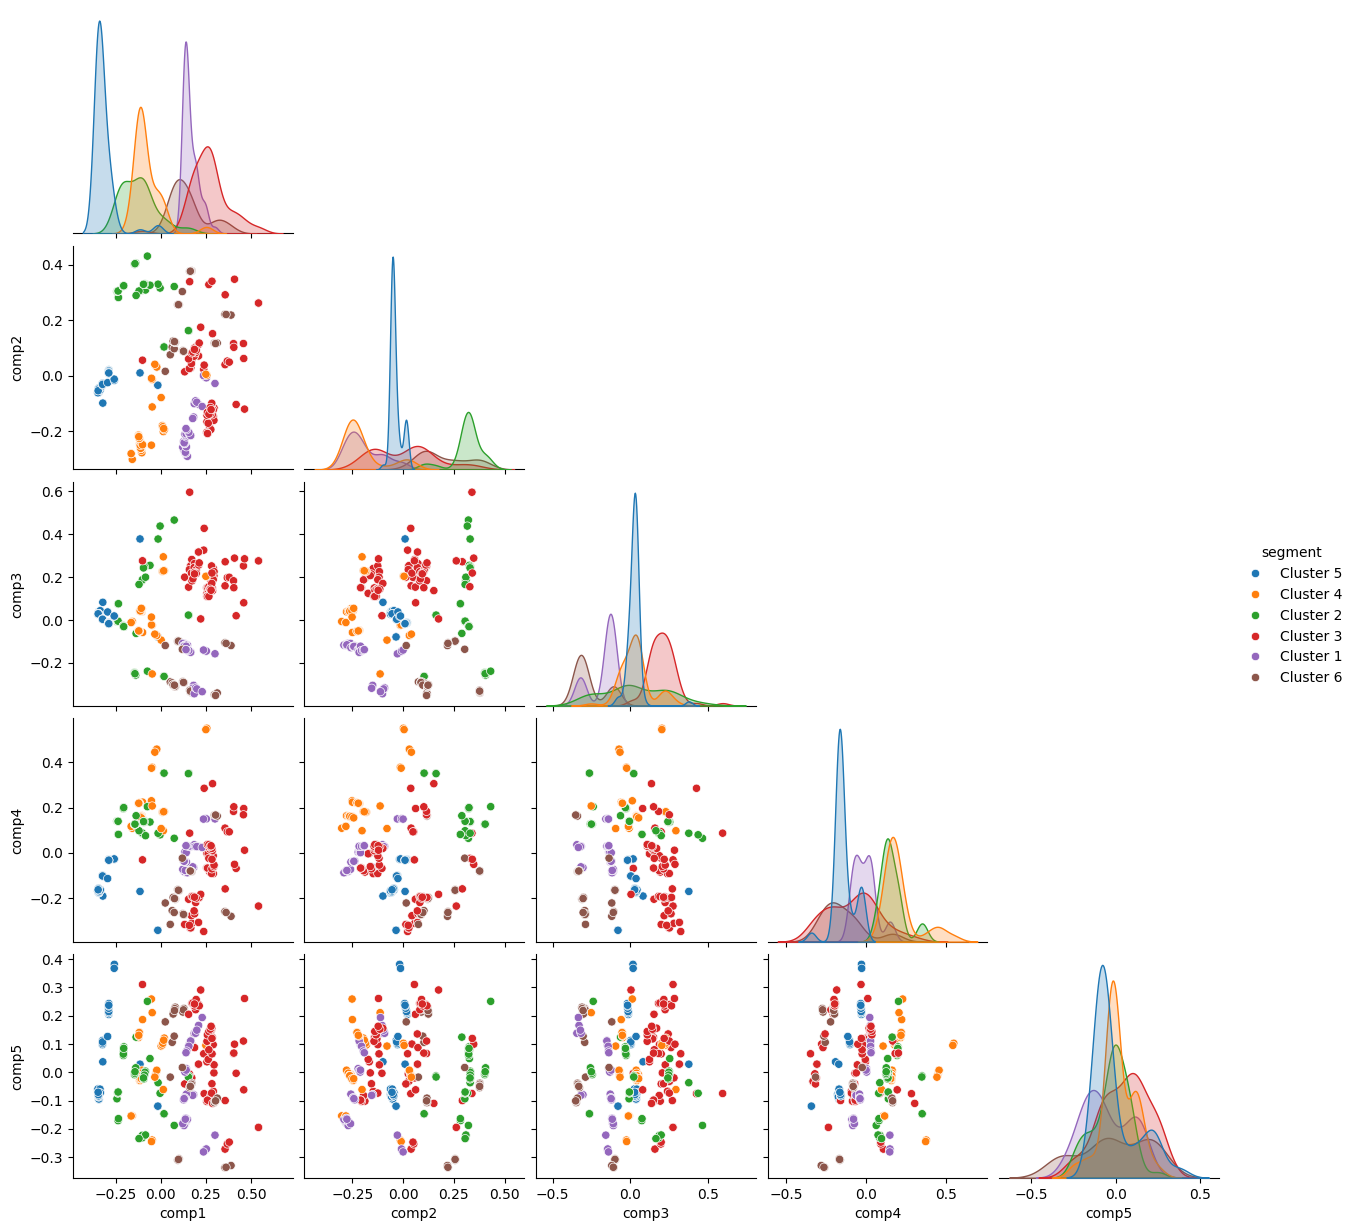

In [34]:
df_clust_pca_kmeans['property_type'] = property_type
df_clust_pca_kmeans['area_name'] = area_name
df_clust_pca_kmeans['unit_type'] = unit_type

dalist = ['segment']
dalist.extend(comp[:compca])

pc66 = df_clust_pca_kmeans[dalist]
sns.pairplot(pc66, hue='segment', corner = True)

### 3D

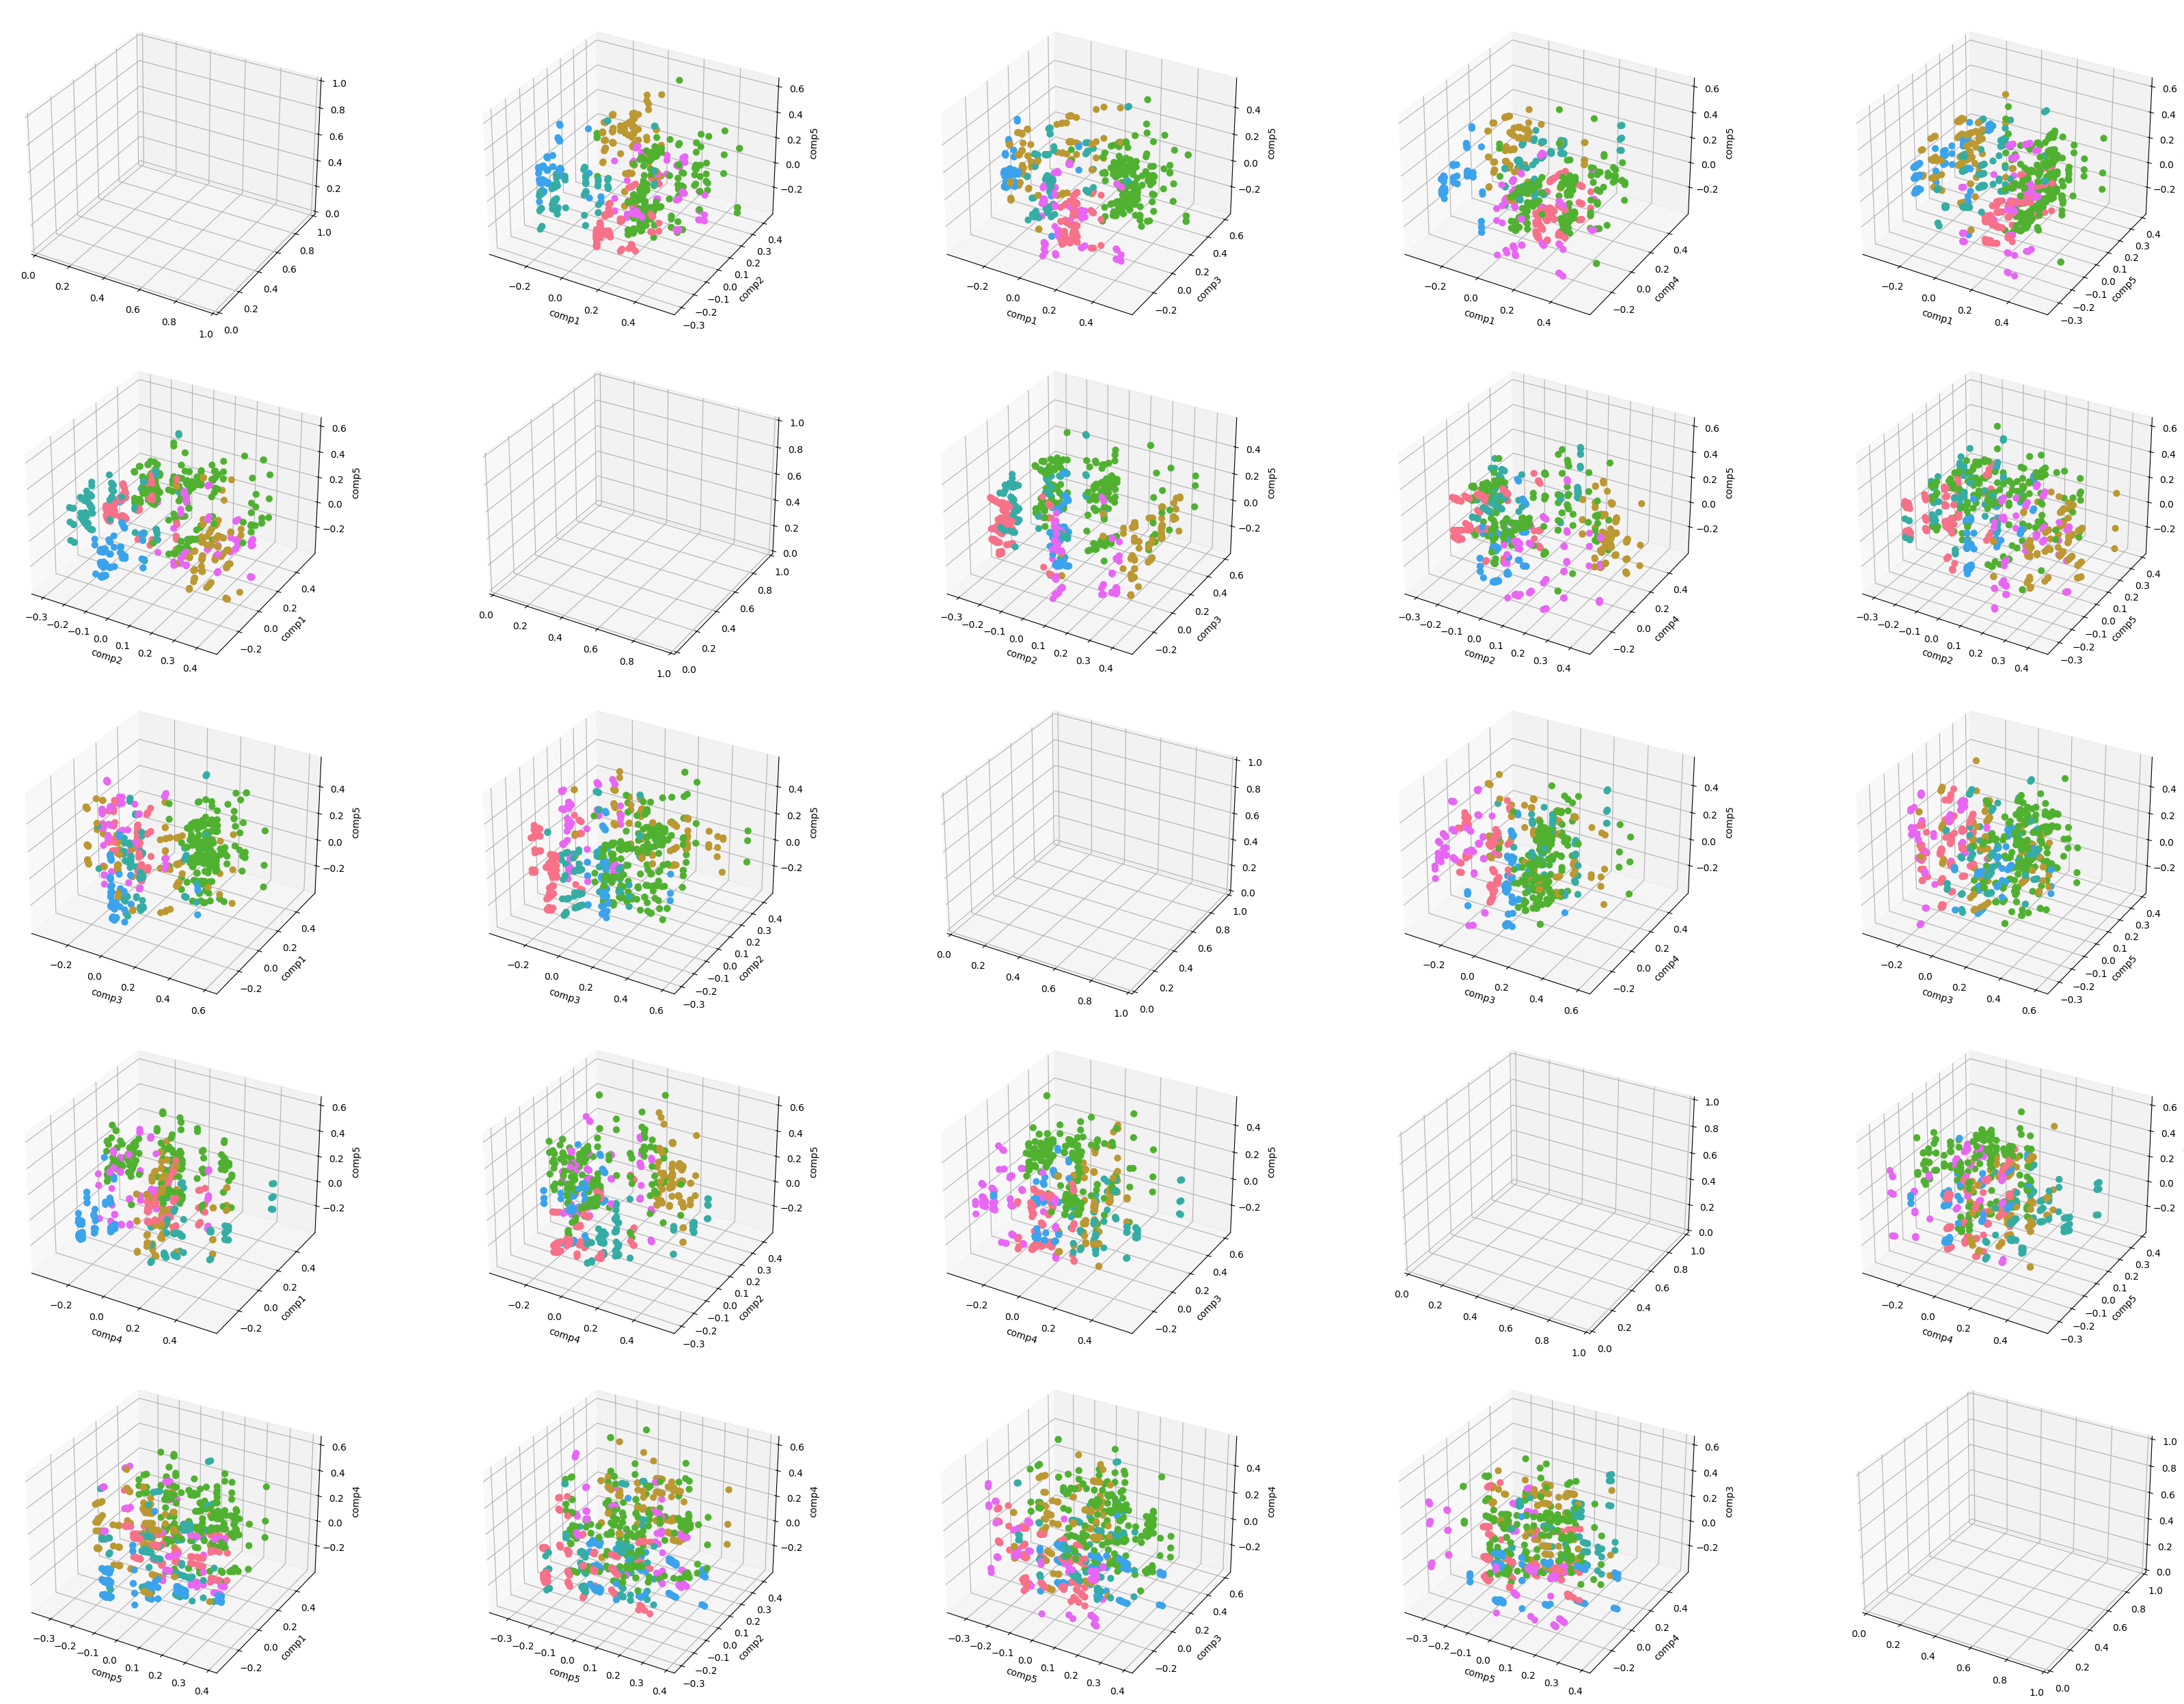

In [35]:
x_cols = comp[:compca]
y_cols = comp[:compca]
z_cols = comp[:compca]

df_clust_pca_kmeans['segment'] = label_encoder.fit_transform(df_clust_pca_kmeans['segment'])
c = df_clust_pca_kmeans['segment']

fig, axs = plt.subplots(compca, compca, figsize=(35, 25), subplot_kw={'projection': '3d'})

# Define color map
cmap = ListedColormap(sns.color_palette("husl", n_colors=len(df_clust_pca_kmeans['segment'].unique())).as_hex())

for i, x_col in enumerate(x_cols):
    for j, y_col in enumerate(y_cols):
        for k, z_col in enumerate(z_cols):
          if x_col != y_col and y_col != z_col and x_col != z_col:
            ax = axs[i, j]
            x = df_clust_pca_kmeans[x_col]
            y = df_clust_pca_kmeans[y_col]
            z = df_clust_pca_kmeans[z_col]
            sc = ax.scatter(x, y, z, s=40, c=c, marker='o', cmap=cmap, alpha=1)
            ax.set_xlabel(x.name)
            ax.set_ylabel(y.name)
            ax.set_zlabel(z.name)

# Add color bar
# fig.colorbar(sc, ax=axs, shrink=0.6, ticks=df_clust_pca_kmeans['segment'].unique())

# Adjust layout
plt.tight_layout()

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# Save Result

In [36]:
#df_clust_pca_kmeans.to_csv('drive/MyDrive/Colab Notebooks/Cluster Bukit Vista/flex/kmeans-7-comp-4-clust.csv')
df_clust_pca_kmeans.to_csv('kmeans-5-components-6-clust.csv')